# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Save the HTML from the browser
html = browser.html

# Create a Beautiful Soup object
soup = BeautifulSoup(html, 'html.parser')



In [5]:
# Extract all rows of data
# Find the table
table = soup.find('table', class_='table')
# Extract all rows
rows = table.find_all('tr', class_='data-row')




### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
all_rows_data = []


# Extract the data from the rows with class 'data-row' using for loops
for row in rows:
    single_row_data = []  # Initialize an empty list for each row's data
    for td in row.find_all('td'):
        single_row_data.append(td.text.strip())  # Append each row's data to the list
    all_rows_data.append(single_row_data)  # Add the single_row_data to the all_rows_data list




In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Extract the column headers using for loops
column_names = []
for th in table.find_all('th'):
    column_names.append(th.text.strip())

mars_temp_df = pd.DataFrame(all_rows_data, columns=column_names)

In [8]:
# Confirm DataFrame was created successfully
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_temp_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
mars_temp_df = mars_temp_df.astype({'sol': 'int', 'ls': 'int', 'month': 'int', 'min_temp': 'float','pressure': 'float'})
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])

In [11]:
# Confirm type changes were successful by examining data types again
print(mars_temp_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [12]:
mars_temp_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
months = mars_temp_df['month'].nunique()
months


12

In [14]:
# 2. How many sols (Martian days) worth of data are there?
mars_temp_df['sol'].count()

1867

In [15]:
# 3. What is the average minimum temperature by month?
avg_min_temp_monthly = mars_temp_df['min_temp'].groupby(mars_temp_df['month']).mean()
avg_min_temp_monthly

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

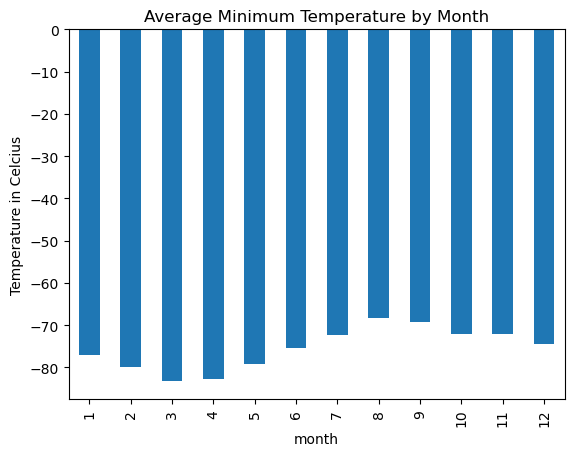

In [16]:
# Plot the average minimum temperature by month
# bar chart

fig = avg_min_temp_monthly.plot(kind='bar', x='min_temp', y='month')

# Add labels and title
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')
plt.title('Average Minimum Temperature by Month')

# Show the plot
plt.show()

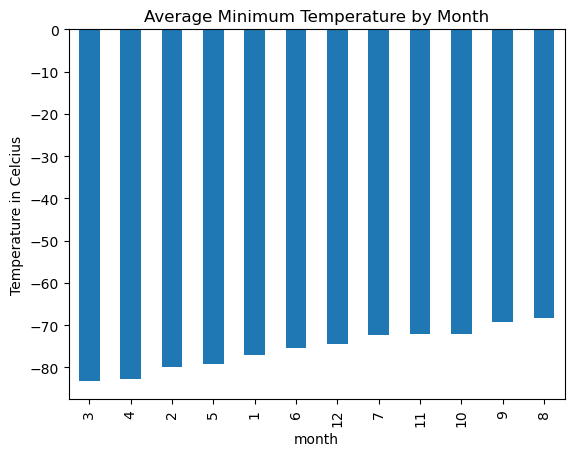

In [17]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
avg_min_temp_monthly_sorted= mars_temp_df['min_temp'].groupby(mars_temp_df['month']).mean().sort_values()

fig = avg_min_temp_monthly_sorted.plot(kind='bar', x='min_temp', y='month')

# Add labels and title
plt.xlabel('month')
plt.ylabel('Temperature in Celcius')
plt.title('Average Minimum Temperature by Month')

# Show the plot
plt.show()

In [18]:
# 4. What is the average pressure by month?

avg_pressure_monthly = mars_temp_df['pressure'].groupby(mars_temp_df['month']).mean()
avg_pressure_monthly


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

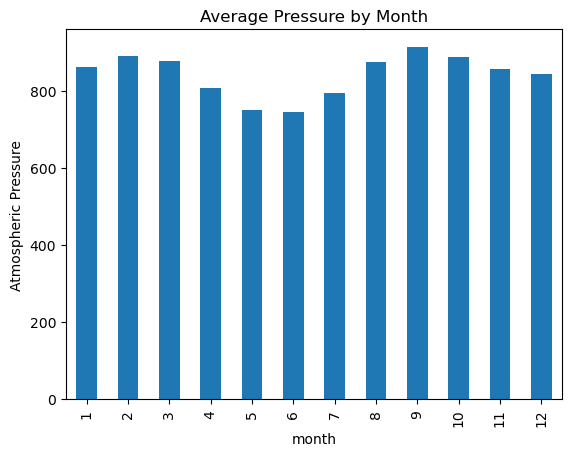

In [25]:
# Plot the average pressure by month

fig = avg_pressure_monthly.plot(kind='bar', x='month', y='pressure')

# Add labels and title
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')

# Show the plot
plt.show()

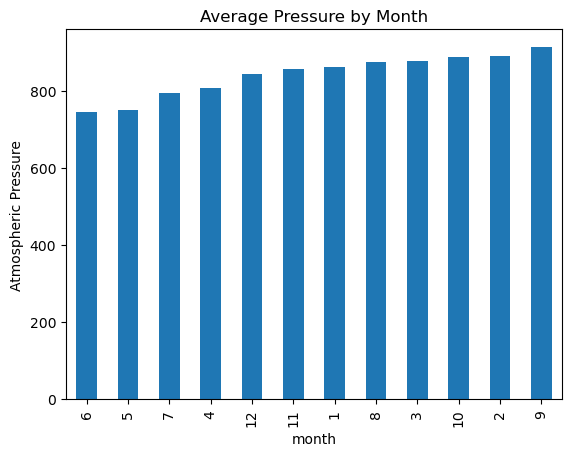

In [26]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure_monthly = mars_temp_df['pressure'].groupby(mars_temp_df['month']).mean().sort_values()

fig = mars_temp_df.plot(kind='bar', x='month', y='pressure')

# Add labels and title
plt.xlabel('month')
plt.ylabel('Atmospheric Pressure')
plt.title('Average Pressure by Month')

# Show the plot
plt.show()

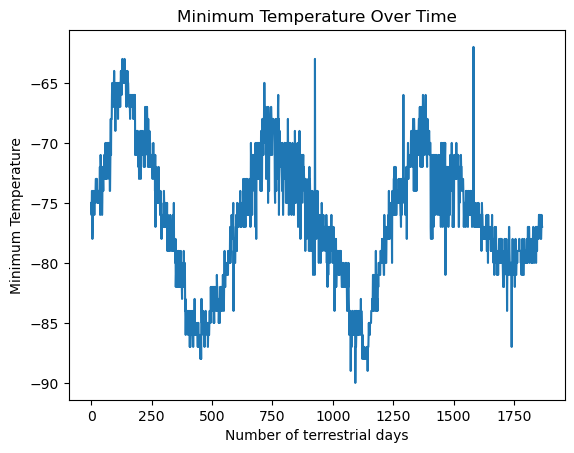

In [34]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
fig = mars_temp_df.plot(kind='line', y='min_temp', legend= "")

# Add labels and title
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.title('Minimum Temperature Over Time')

# Show the plot
plt.show()

#### Minimum Temperature
How many months exist on Mars? 12  

How many Martian (and not Earth) days worth of data exist in the scraped dataset? 1867  

What are the coldest and the warmest months on Mars (at the location of Curiosity)?  
coldest month - '3'  
warmest month - '8'

#### Atmospheric Pressure

Which months have the lowest and the highest atmospheric pressure on Mars?  
Month with lowest atmospheric pressure - '6'  
Month with highest atmospheric pressure - '9'  


#### Year Length

About how many terrestrial (Earth) days exist in a Martian year? Visually estimate the result by plotting the daily minimum temperature.  

650 terrestrial (Earth) days exist in a Martian year. Estimate based on visual observation of two sets of most min temps across the terrestrial days, approx. on day 450 to day 1100, and again checking the next set of lowest min_temps on the day 1100 to the day 1750. This range likely shows a Martian year since the min temps come full circle within it. Hence the Martian Year is equal to approx. 650 Earth days.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [35]:
# Write the data to a CSV
mars_temp_df.to_csv('mars_temp.csv', index=False)

In [36]:
browser.quit()